In [ ]:
!pip install numdifftools

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
from typing import Callable, Union

from scipy.optimize import minimize, fsolve, bisect, ridder
import numdifftools as ndt

In [3]:
data = np.loadtxt("dec_lengths.txt")
data = np.sort(data)

In [4]:
def pdf(y2: float, params) -> Union[float, np.ndarray]:
  y1, data = params
  y1 = 1/y1
  y2 = 1/y2
  p1 = y1*np.exp(-y1*data)
  p2 = y2*np.exp(-y2*data)
  return 0.84*p1 + 0.16*p2

In [5]:
def mixed_exponential_pdf(y2_inverse: float, params) -> Union[float, np.ndarray]:
    """
    Probability density function (PDF) for a mixture of two exponential distributions.
    
    Parameters
    ----------
    y2_inverse : float
        The inverse of the second exponential distribution parameter (1 / lambda_2).
    
    params : tuple
        A tuple containing the inverse of the first exponential distribution parameter (1 / lambda_1) and the data points.
    
    Returns
    -------
    Union[float, np.ndarray]
        The PDF values for the given data points based on the mixture of two exponential distributions.
    """
    y1_inverse, data = params
    y1 = np.asarray(1/y1_inverse)
    y2 = np.asarray(1/y2_inverse)
    p1 = np.exp(np.outer(data,-y1))*y1
    p2 = np.exp(np.outer(data, -y2))*y2
    return 0.84 * p1 + 0.16 * p2

In [6]:
p = (4188.0, data)
print(-np.sum(np.log(mixed_exponential_pdf(0.1, p))))
print(-np.sum(np.log(mixed_exponential_pdf(0.01, p))))

937254.9089397528
937462.0430694247


In [7]:
def neg_log_likelihood_gauss(y2, params) -> float:
    return -np.sum(np.log(mixed_exponential_pdf(y2, params)), axis=0)
     

bnd = (0, None)
p = [4188.0, data]
neg_log_likelihood_gauss(0.1, p)

array([937254.90893975])

In [42]:
if not isinstance(p, tuple):
        p = (p,)
p

([4188.0,
  array([6.56179931e-02, 7.14683653e-02, 7.37256079e-02, ...,
         4.05635135e+04, 4.14334330e+04, 4.31568658e+04])],)

In [14]:
res_neg_log = minimize(neg_log_likelihood_gauss, method='Powell', x0=(500.0),bounds=(bnd,), args=p)
print(1/res_neg_log.x)
print(res_neg_log)
print(p[0])
x_min = res_neg_log.x
print(x_min)

[0.00177822]
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 916722.03383062
       x: [ 5.624e+02]
     nit: 1
   direc: [[ 1.000e+00]]
    nfev: 19
4188.0
[562.36120281]


In [9]:
hessian_func = ndt.Hessian(neg_log_likelihood_gauss)
hessian_matrix = hessian_func(res_neg_log.x, p)
print(p[0])
print(hessian_matrix)
inv_hessian = np.linalg.inv(hessian_matrix)
uncertainties = np.sqrt(np.diag(inv_hessian))

print("Parameter uncertainties:", uncertainties)
print(uncertainties/res_neg_log.x*100)

4188.0
[[0.01011085]]
Parameter uncertainties: [9.94503212]
[1.76860169]


In [10]:
x_axis = np.linspace(500,700,1000)
y1_inverse, data = p
y1 = np.asarray(1/y1_inverse)
y2 = np.asarray(1/x_axis)
print(x_axis.shape)
print(y1.shape)
print(y2.shape)

(1000,)
()
(1000,)


In [65]:
p1 = np.exp(np.outer(data,-y1))*y1
print(p1.shape)
print(np.sum(p1,axis=0))

(100000, 1)
[13.39564929]


In [67]:
p2 = np.exp(np.outer(data, -y2))*y2
print(p2.shape)
print(np.sum(p2,axis=0).shape)

(100000, 1000)
(1000,)


In [69]:
res = 0.84 * p1 + 0.16 * p2
res.shape

(100000, 1000)

In [83]:

    
res = 0.84 * p1 + 0.16 * p2
res1 = mixed_exponential_pdf(x_axis, p)
res2 = neg_log_likelihood_gauss(x_axis, p)
print(data.shape)
print(x_axis.shape)
print(res.shape)
print(res1.shape)
print(res2.shape)

(100000,)
(1000,)
(100000, 1000)
(100000, 1000)
(1000,)


In [36]:
res2 = -np.sum(np.log(res),axis=0)
res2

array([ 1.31173073,  1.31174066,  1.31174449, ..., 18.19998465,
       18.40770182, 18.81921872])

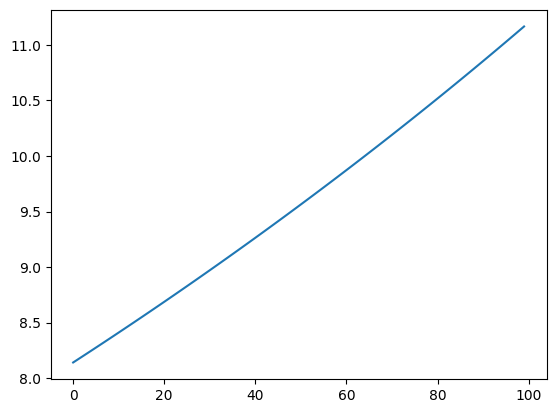

In [77]:
err = np.sqrt(1/np.asarray(res))
plt.plot(err)

In [75]:
res = []
for i in range(500,600):
    res.append(hessian_func(i, p)[0][0])
res

[0.015087243701707699,
 0.014989094408291003,
 0.014891643762176792,
 0.014794885893213825,
 0.014698815047224402,
 0.014603425471089884,
 0.014508711575589141,
 0.014414667695993578,
 0.01432128834523075,
 0.014228567918041007,
 0.014136501079763462,
 0.014045082394640225,
 0.013954306563059975,
 0.013864168266788475,
 0.01377466228222766,
 0.013685783420128116,
 0.013597526546292864,
 0.013509886555995242,
 0.013422858483168312,
 0.013336437290450712,
 0.013250618036336639,
 0.013165395839229396,
 0.013080765810063172,
 0.012996723236145693,
 0.012913263265933022,
 0.012830381237555174,
 0.012748072524901658,
 0.012666332434660255,
 0.012585156422136975,
 0.012504539949861292,
 0.012424478503317541,
 0.012344967746962742,
 0.01226600312647001,
 0.01218758033203949,
 0.012109695024487168,
 0.012032342928927907,
 0.011955519804520696,
 0.011879221450760839,
 0.01180344368666355,
 0.011728182390905818,
 0.011653433468796487,
 0.011579192860707563,
 0.011505456577543696,
 0.0114322206014

In [ ]:
x_axis = np.linspace(500,630,50)
plt.plot(500, hess(500, p))
plt.show()

In [57]:
x_axis = np.linspace(x_min[0]-15, x_min[0]+15, 50)
y_axis = neg_log_likelihood_gauss(x_axis, p)
y_min = neg_log_likelihood_gauss(x_min, p)
y_axis -= y_min 

In [58]:
NLL = neg_log_likelihood_gauss
y_min = NLL(x_min, p)
print(y_min)
def func(x):
    return [NLL(x, p) - y_min - 0.5][0][0]
func(x_min)

[916722.03383062]


-0.5

In [59]:
root1 = ridder(func, x_min, x_min+20)
root2 = ridder(func, x_min, x_min-10)
print(root1)
print(root2)

572.3612087612099
552.4688529225568


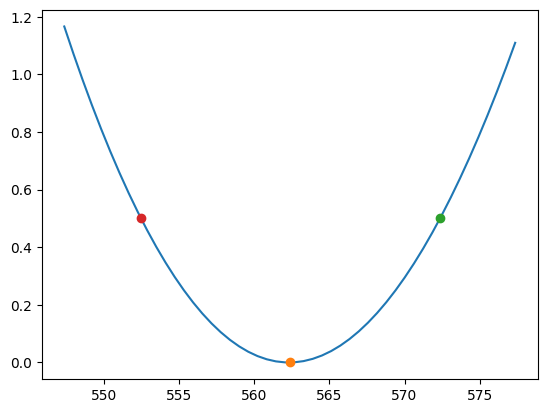

In [63]:
hessian_func(res_neg_log.x, p)

plt.plot(x_axis, y_axis)
plt.plot(x_min, neg_log_likelihood_gauss(x_min, p)-y_min,"o")
plt.plot(root1, neg_log_likelihood_gauss(root1, p)-y_min,"o")
plt.plot(root2, neg_log_likelihood_gauss(root2, p)-y_min,"o")
plt.show()
min_point = (x_min, neg_log_likelihood_gauss(x_min, p)-y_min)
ci_point1 = (root1, neg_log_likelihood_gauss(root1, p)-y_min)
ci_point2 = (root2, neg_log_likelihood_gauss(root2, p)-y_min)


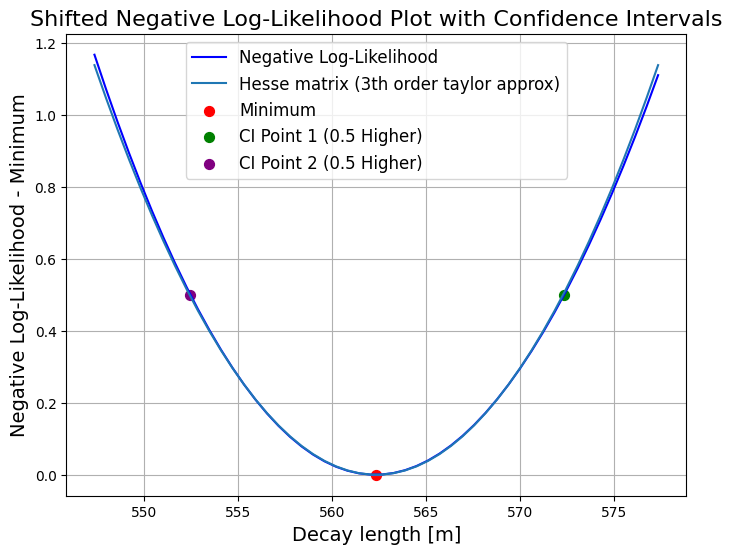

In [83]:
plt.figure(figsize=(8, 6))

# Plot the negative log-likelihood data
plt.plot(x_axis, y_axis, linestyle='-', color='blue', label='Negative Log-Likelihood')
plt.plot(x_axis, 0.5*0.01011085*(x_axis-x_min)**2, label='Hesse matrix (3th order taylor approx)')

# Mark the minimum point and the two confidence interval points
plt.scatter(*min_point, marker='o', color='red', s=50, label='Minimum')
plt.scatter(*ci_point1, marker='o', color='green', s=50, label='CI Point 1 (0.5 Higher)')
plt.scatter(*ci_point2, marker='o', color='purple', s=50, label='CI Point 2 (0.5 Higher)')

# Set the labels and title for the plot
plt.xlabel('Decay length [m]', fontsize=14)
plt.ylabel('Negative Log-Likelihood - Minimum', fontsize=14)
plt.title('Shifted Negative Log-Likelihood Plot with Confidence Intervals', fontsize=16)

# Add a grid for easier readability
plt.grid(True)

# Add a legend to explain the markers
plt.legend(fontsize=12)

# Save the plot as a file (optional)
plt.savefig('negative_log_likelihood_plot.png', dpi=300)

# Show the plot
plt.show()

In [62]:
x_min-root1

array([-10.00000595])

## Calculating the $\mu_{kaons}$ from $\mu_{total}$ and $\mu_{pions}$
We have the following means
\begin{equation}
\mu_{kaons}\frac{1}{n_{kaons}}\sum_i x_i \qquad \mu_{pions}\frac{1}{n_{pions}}\sum_i x_i, \qquad \mu_{total}=\frac{1}{n_{pions}+n_{kaons}}\sum_i x_i
\end{equation}


Given that we already know $\mu_{pion}$, $\mu_{total}$ and the ration f $n_{pions}$ and $n_{kaons}$ we get 
 

\begin{equation}
\mu_{kaons} = \frac{(n_{kaons}+n_{pions})\mu_{total}-n_{pions}\cdot\mu_{total}}{n_{kaons}}
\end{equation}


In [23]:
mu = np.mean(data)
mu_pions = 4188
pion_tau = 2.6033*10**(-8)
byc = mu_pions/pion_tau
n_pions = 0.84*len(data)
n_kaons = 0.16*len(data)
mu_kaons = ((n_kaons+n_pions)*mu - n_pions*mu_pions)/n_kaons
mu_kaons/byc

3.3353352317517785e-09

# 


In [83]:
print(mu_kaons)
print(mu_pions)

536.564512371853
4188


In [34]:
mu_pions = 4188
pion_tau = 2.6033*10**(-8)
byc = mu_pions/pion_tau
mu_kaons = 1/res_neg_log.x
kaon_tau = mu_kaons/byc
print(pion_tau)
print(kaon_tau)



2.6033e-08
[3.49500609e-09]


In [118]:
s1 = 562.2512011
s2 = 4188
t1 = 1.2380*1e-8
t2 = 2.6033*1e-8
c = 299792458
v1 = s1/t1*1/(np.sqrt(1+s1**2/(t1**2*c**2)))
v2 = s2/t2*1/(np.sqrt(1+s2**2/(t2**2*c**2)))
print(v1/v2)

0.9999799503363256


In [72]:
!pip install sympy

     ---------------------------------------- 6.5/6.5 MB 31.8 MB/s eta 0:00:00
     ------------------------------------- 536.2/536.2 kB 35.1 MB/s eta 0:00:00


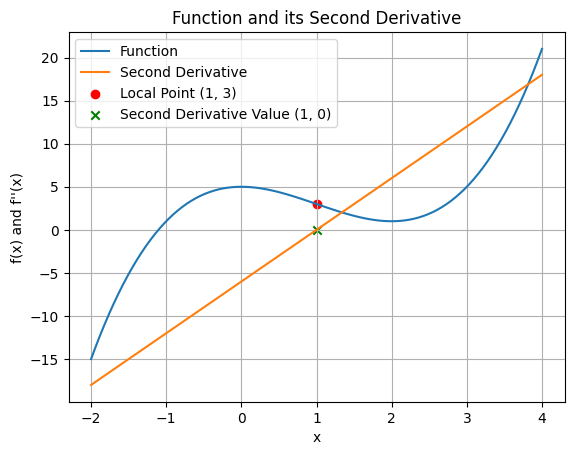

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
x = sp.Symbol('x')

# Define the function (replace this with your function)
f = x**3 - 3*x**2 + 5

# Find the second derivative
f_2nd_derivative = f.diff(x, 2)
local_point = 1  # Replace this with your local point

# Evaluate the second derivative at the local point
f_2nd_derivative_value = f_2nd_derivative.subs(x, local_point)
f_np = sp.lambdify(x, f, 'numpy')
f_2nd_derivative_np = sp.lambdify(x, f_2nd_derivative, 'numpy')

x_values = np.linspace(-2, 4, 100)  # Adjust the range as needed

# Plot the function
plt.plot(x_values, f_np(x_values), label='Function')

# Plot the second derivative
plt.plot(x_values, f_2nd_derivative_np(x_values), label='Second Derivative')

# Mark the local point
plt.scatter(local_point, f_np(local_point), c='r', marker='o', label=f'Local Point ({local_point}, {f_np(local_point)})')
plt.scatter(local_point, f_2nd_derivative_value, c='g', marker='x', label=f'Second Derivative Value ({local_point}, {f_2nd_derivative_value})')

plt.xlabel('x')
plt.ylabel('f(x) and f\'\'(x)')
plt.title('Function and its Second Derivative')
plt.legend()
plt.grid(True)

# Save the plot as a file (optional)
plt.savefig('function_and_second_derivative.png', dpi=300)

# Show the plot
plt.show()